In [2]:
import sys
sys.path.append("../src") 
sys.path.append("../data") 


import SDE_class as sde
import importlib
importlib.reload(sde)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import util as util
importlib.reload(util)

<module 'util' from '../src/util.py'>

In [3]:
term=5
step=1
init=np.array([0.])
repeat_number=1

In [4]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

In [5]:
mymodel.many_step(init).reshape(term+1,1)

array([[ 0.        ],
       [ 1.14891579],
       [-0.57560832],
       [-1.20727503],
       [-1.34231262],
       [ 0.12432216]])

In [6]:
for k in range(repeat_number):
    mymodel.many_step(init)

In [7]:
term=7
step=1
now_position=np.array([0.])
repeat_number=30000
matrix=np.zeros([term+1,repeat_number+1])

for j in range(repeat_number):
    now_position=np.array([0])
    for k in range(term):
        new_position = mymodel.one_step(now_position)
        matrix[k+1,j+1]=new_position
        now_position = new_position
#print(matrix)

In [8]:
cov_matrix=np.zeros([term+1,term+1])
for j in range(term+1):
    for k in range(term+1):
        mean_j=np.mean(matrix[j,:])
        mean_k=np.mean(matrix[k,:])
        mean_jk=(np.dot(matrix[j,:],matrix[k,:]))/repeat_number
        cov=mean_jk-mean_k*mean_j
        cov_matrix[j,k]=cov
print(cov_matrix)


[[ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.9996958   0.99864482  1.00151009  1.00293388  1.00037794
   0.98940911  0.99364757]
 [ 0.          0.99864482  2.00920147  2.01481385  2.012429    2.01130223
   2.00031305  2.00187237]
 [ 0.          1.00151009  2.01481385  3.03525033  3.0350221   3.03812328
   3.03240508  3.02534188]
 [ 0.          1.00293388  2.012429    3.0350221   4.04035687  4.04966571
   4.04636753  4.04439047]
 [ 0.          1.00037794  2.01130223  3.03812328  4.04966571  5.06476348
   5.05584762  5.0597828 ]
 [ 0.          0.98940911  2.00031305  3.03240508  4.04636753  5.05584762
   6.04484768  6.04875565]
 [ 0.          0.99364757  2.00187237  3.02534188  4.04439047  5.0597828
   6.04875565  7.054016  ]]


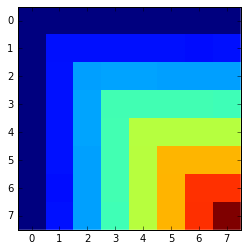

In [9]:
plt.imshow(cov_matrix, interpolation = "None")

In [10]:
now_position

array([[ 3.66536613]])

In [11]:
for k in range(term):
    new_position = mymodel.one_step(now_position)
    print(new_position)
    #matrix[k+1,j]=new_position
    #now_position = new_position

[[ 2.53293753]]
[[ 4.04505599]]
[[ 4.01231999]]
[[ 2.49134332]]
[[ 4.03649249]]
[[ 4.36243206]]
[[ 4.79885427]]


In [12]:
np.zeros([3,2])

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])